# Machine Learning for Finance Homework 3

In this homework, we will focus on 

1.   Sentiment Analysis using NLP
2.   Clustering with KMeans++, Inertia, PCA and short EDA
3.   Individual project proposal


## 1. Pre-trained model: FinBERT

Your hedge fund manager wakes up every morning at 4am and wants a concise summary of the news relevant to his portfolio. He/She wants a quick summary showing the headlines of the news as well as classified sentiment scores.

Furthermore, he/she asks you to aggregate this information per stock and summarize the overall tone for this stock

1.1 Install the transformers package

In [1]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


1.2 import the requests package and other libraries you might need

In [2]:
import pandas as pd
import requests

The following dictionary represents our portfolio of stocks using the following logic (key, value) = (holding-name, branch), where $$branch ∈ \{"business", "entertainment", "general", "health", "science", "sports", "tech
nology"\}$$
following the NewsAPI documentation.

To save you some time, a typical request is built similar to:
"https://newsapi.org/v2/top-headlines?country=us&q=*KEYWORD*&category=*CATEGORY*&sortBy=top&apiKey=*YOURKEYHERE*".

For example: 

https://newsapi.org/v2/top-headlines?country=us&q=apple&category=technology&sortBy=top&apiKey=123ab45c687d...





Please see:


1.   https://newsapi.org/docs (To construct your HTTP GET-requests)
2.   https://newsapi.org/register (To obtain your API key)




In [3]:
portfolio = dict({"apple": 'technology', "tesla": 'business', "amazon": 'technology', "s&p500": 'business'})

# we are going to use the S&P500 to get a general idea of the sentiment of news in the US market

1.3 Write the function fetch_news() that returns a dictionary that stores the name of the holding as key (analogous to our stock portfolio) and as value an array that holds the strings of news

In [4]:
# This is my api_key
api_key = "1fa2671224264342a6af4a9cc19c8eb8"

def fetch_news():
    result = {}
    for keyword in portfolio.keys():
        request_str = "https://newsapi.org/v2/top-headlines?country=us&q=" + \
                        keyword + "&category=" + portfolio.get(keyword) + \
                        "&sortBy=top&apiKey=" + api_key
        result[keyword] = [dic.get("title") for dic in requests.get(request_str).json().get("articles")]
    return result

In [5]:
fetch_news()

{'apple': ['M2 MacBook Air and MacBook Pro coming at WWDC? - 9to5Mac',
  'Apple Sees Virtual-Reality Headset as Its Next Big Thing - The New York Times',
  "All the news coming out of Apple's Worldwide Developers Conference - The Verge",
  'Apple Prepares to Challenge Facebook - TheStreet',
  'The new MacBook Air might come with a long wait time - The Verge',
  'Apple iPad Air M1 long-term review: Still the only tablet you should buy - Android Central',
  'Apple’s Coming iOS 16: A Wish List - The Wall Street Journal',
  'iPhone Emoji Are the Worst (and Here’s Proof) - How-To Geek',
  'Shockingly similar iPhone 14 Pro and Pixel 7 Pro designs not a coincidence: Is Google copying Apple? - PhoneArena',
  'How to enable Audio Hints for Fitness+ on Apple iPhone - MobiGyaan',
  'Big vote on Tuesday in Europe could determine the future of the Lightning port on iPhone - PhoneArena'],
 'tesla': ['Elon Musk feud with Bill Gates boils over to Twitter - Fox Business',
  'Elon Musk’s Bot Problem on 

1.4 Following the lecture notes, using the pre-trained Finbert Classifier, classify the news fetched in 1.3 into neutral, positive or negative by modifying the below code:

1.5 Last but not least, find the total tone for each element in our portfolio, where:


*   neutral=0
*   positive=+1
*   negative=-1

In [6]:
# BUILD YOUR CODE ON TOP OF THIS EXAMPLE CODE IN THE CELL BELOW
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

sentences = ["there is a shortage of capital, and we need extra financing", 
             "growth is strong and we have plenty of liquidity", 
             "there are doubts about our finances", 
             "profits are flat"]

inputs = tokenizer(sentences, return_tensors="pt", padding=True)
outputs = finbert(**inputs)[0]

labels = {0:'neutral', 1:'positive',2:'negative'}
for idx, sent in enumerate(sentences):
    print(sent, '----', labels[np.argmax(outputs.detach().numpy()[idx])])
    
'''
there is a shortage of capital, and we need extra financing ---- negative
growth is strong and we have plenty of liquidity ---- positive
there are doubts about our finances ---- negative
profits are flat ---- neutral
'''

Downloading:   0%|          | 0.00/533 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/419M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/221k [00:00<?, ?B/s]

there is a shortage of capital, and we need extra financing ---- negative
growth is strong and we have plenty of liquidity ---- positive
there are doubts about our finances ---- negative
profits are flat ---- neutral


'\nthere is a shortage of capital, and we need extra financing ---- negative\ngrowth is strong and we have plenty of liquidity ---- positive\nthere are doubts about our finances ---- negative\nprofits are flat ---- neutral\n'

In [7]:
# Your code here
import re

# Define a function to remove the author name at the end of each title.
def parseSentence(sen: str) -> str:
    return re.split("[\s]-[\s]", sen)[0]

classified_news = {}
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone', 
                                                        num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
labels = {0:'neutral', 1:'positive', 2:'negative'}

for company in fetch_news().keys():
    classified_news[company] = []
    sentences = list(map(parseSentence, fetch_news().get(company)))
    if not sentences:
        continue
    else:
        inputs = tokenizer(sentences, return_tensors="pt", padding=True)
        outputs = finbert(**inputs)[0]
        for idx, sent in enumerate(sentences):
            classified_news[company].append(sent + '----' + \
                            labels[np.argmax(outputs.detach().numpy()[idx])])
classified_news

{'apple': ['M2 MacBook Air and MacBook Pro coming at WWDC?----neutral',
  'Apple Sees Virtual-Reality Headset as Its Next Big Thing----positive',
  "All the news coming out of Apple's Worldwide Developers Conference----neutral",
  'Apple Prepares to Challenge Facebook----negative',
  'The new MacBook Air might come with a long wait time----neutral',
  'Apple iPad Air M1 long-term review: Still the only tablet you should buy----neutral',
  'Apple’s Coming iOS 16: A Wish List----neutral',
  'iPhone Emoji Are the Worst (and Here’s Proof)----negative',
  'Shockingly similar iPhone 14 Pro and Pixel 7 Pro designs not a coincidence: Is Google copying Apple?----negative',
  'How to enable Audio Hints for Fitness+ on Apple iPhone----positive',
  'Big vote on Tuesday in Europe could determine the future of the Lightning port on iPhone----neutral'],
 'tesla': ['Elon Musk feud with Bill Gates boils over to Twitter----neutral',
  'Elon Musk’s Bot Problem on Twitter Is Extraordinary----negative',
  

In [8]:
# Your code here
tone_dic = {"neutral": 0, "positive": 1, "negative": -1}
total_tone = 0
for company in classified_news.keys():
    for sentence in classified_news.get(company):
        total_tone += tone_dic.get(re.split("----", sentence)[1])
total_tone

-5

## 2. K-Means++ Clustering with PCA

---

To make it easier for you, for the analysis important EDA has already been performed. However, it is your task to interpret


2.1 Import necessary libraries...

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

2.2 Read the credit card data into a dataframe

In [10]:
cc_holders = pd.read_csv("credit_card.csv")

2.3 Show a snippet of the dataframe

In [11]:
cc_holders

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


2.4 Gather information about missing data, data type and the dimensions of the dataset

In [12]:
cc_holders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

2.5 Gather statistical measures about each column

In [13]:
cc_holders.describe().style.background_gradient(cmap = 'twilight')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


2.6 Examine the correlation value for each column with each other column

In [14]:
cc_holders.corr().style.background_gradient(cmap = 'RdYlGn')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


2.7 Create a heatmap showing all positive or negative correlations higher 
than .5

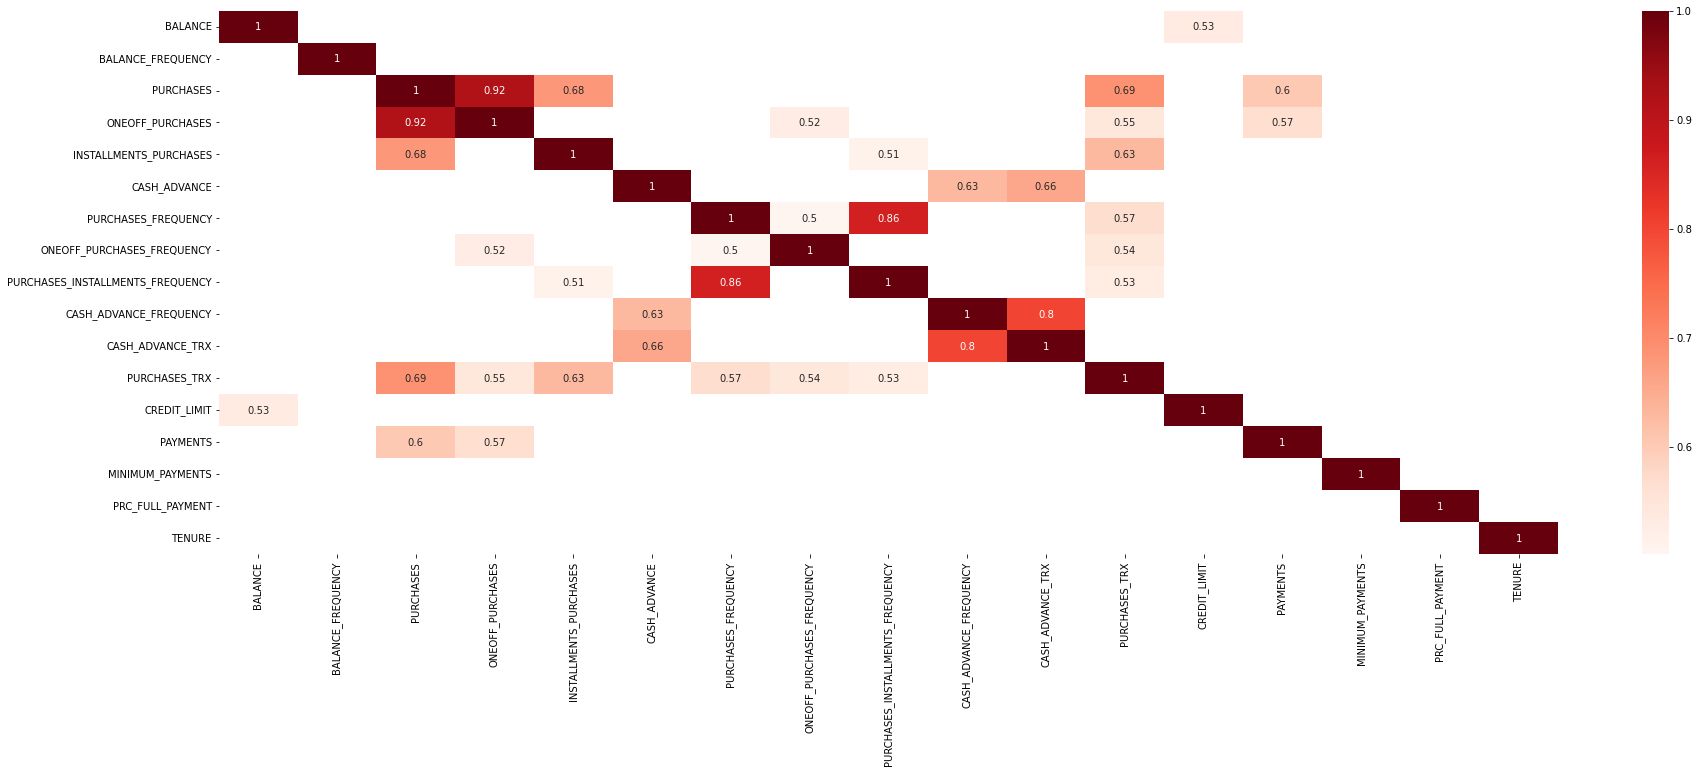

In [15]:
cc_corr = cc_holders.corr()

cc_corr_filt = cc_corr[((cc_corr >= .5) | (cc_corr <= -.5))]
plt.figure(figsize=(30,10))
sns.heatmap(cc_corr_filt, annot=True, cmap="Reds")
plt.show()

What do you observe? What conclusions can you draw from looking at the correlations, and how would that influence a principal components analysis routine? Why do we do Principal Components Analysis?

# Answer
The heatmap directly shows us the pairs of variables which have a high correlation (with absolute value over 0.5) with each other. The darker cells means higher correlations, and indeed we should ignore the correlations with value 1 on the diagonal, since they are just correlations with themselves.

However, we can also observe some extremely high correlations, for instance, variable **PURCHASES** and **ONEOFF_PURCHASES** have a 0.92 correlation, and variable **PURCHASES_INSTALLMENTS_FREQUENCY** and **PURCHASES_FREQUENCY**. Besides, pairs such as **PURCHASES** and **PURCHASES_TRX**, **CASH_ADVANCE** and **CASH_ADVANCE_TRX** also have relatively high correlation over 0.65. Therefore, one important information we can get is that, for this data set, high correlations were more likely been found between the variables who have similar names, such as **PURCHASES** and **PURCHASES_TRX**. This characteristic may influence the number of components when performing PCA, since some variables are similar to each other hence may be regarded as exactly one component.

We do the PCA for reducing the dimensions in our model, or making our model simplier to reduce the possibility of overfitting and hence producing a high test error, since a high correlation represents that same information are covered by multiple variables simultaneously.

2.8 Examine the discrete distributions of each feature column

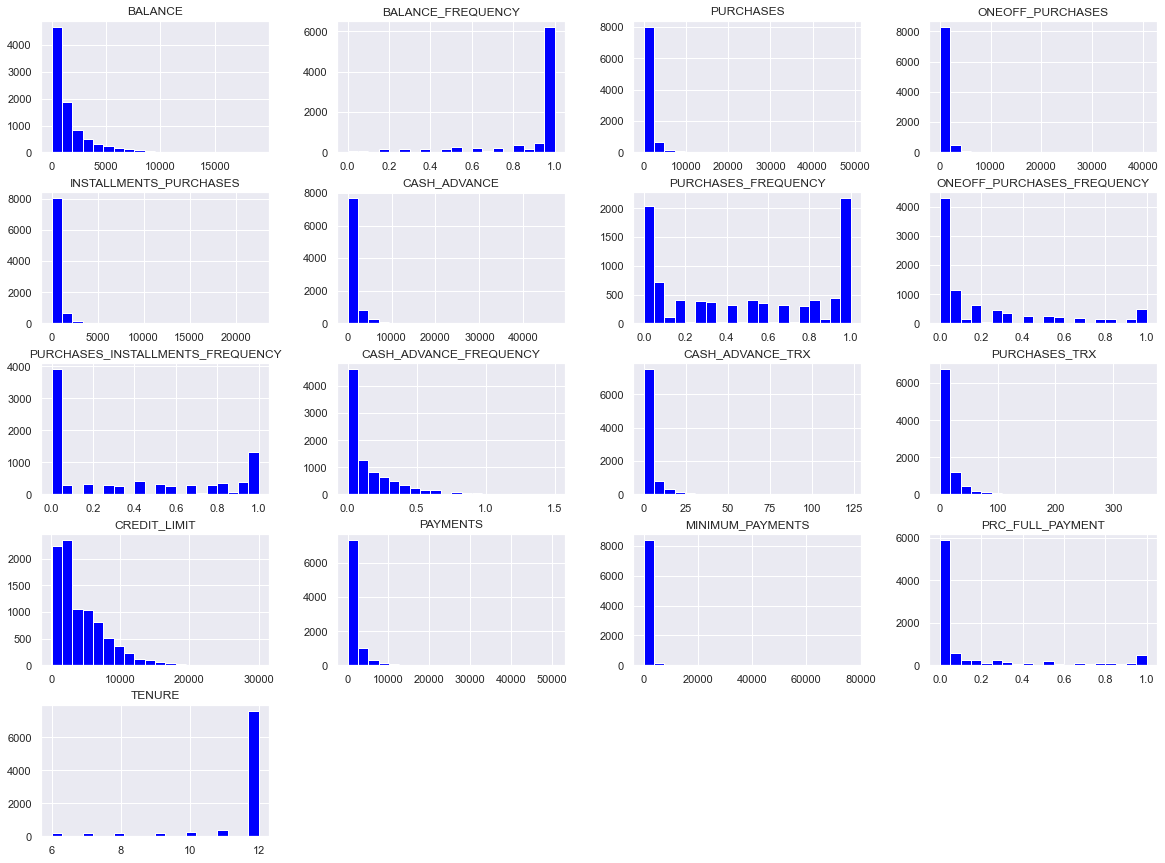

In [16]:
sns.set(rc={'figure.figsize':(20, 15)})
dists = cc_holders.hist(bins=20, color='blue')

What can you conclude about the distributions of the variables in the data set? In 3-4 sentences, describe methods of handling outliers following the lecture notes.

2.9
*Your answer here*

For most of the variables shown in the tables above, their distributions are not balanced and symmetric, which means that they skew to one side.

We can take logarithms on the skewed data which makes the gap smaller. We can also binning or bucketing the data into some groups, that it, tranforming continuous data into categorical. 

2.10 Examine the data set for missing values

In [17]:
cc_holders.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

2.11 Is it reasonable to fill missing values with the median? If so, fill the missing values with the median.

0.034972067039106144


(array([8.532e+03, 6.500e+01, 2.100e+01, 1.100e+01, 1.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([1.91630000e-02, 7.64063800e+03, 1.52812568e+04, 2.29218757e+04,
        3.05624945e+04, 3.82031133e+04, 4.58437322e+04, 5.34843510e+04,
        6.11249698e+04, 6.87655887e+04, 7.64062075e+04]),
 <BarContainer object of 10 artists>)

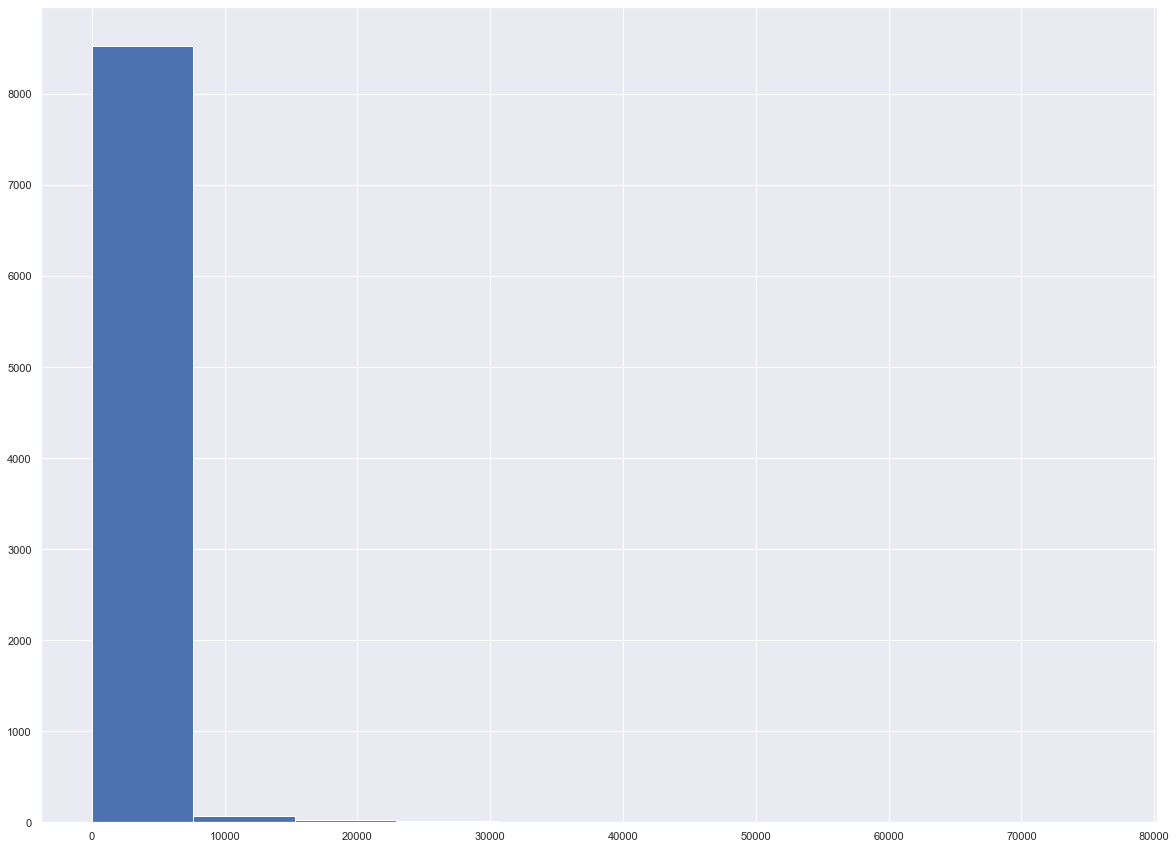

In [18]:
# Your code here
print(cc_holders["MINIMUM_PAYMENTS"].isna().sum() / len(cc_holders["MINIMUM_PAYMENTS"]))
plt.hist(cc_holders["MINIMUM_PAYMENTS"])

(array([4.583e+03, 2.095e+03, 1.326e+03, 5.780e+02, 2.150e+02, 1.090e+02,
        3.300e+01, 6.000e+00, 1.000e+00, 3.000e+00]),
 array([   50.,  3045.,  6040.,  9035., 12030., 15025., 18020., 21015.,
        24010., 27005., 30000.]),
 <BarContainer object of 10 artists>)

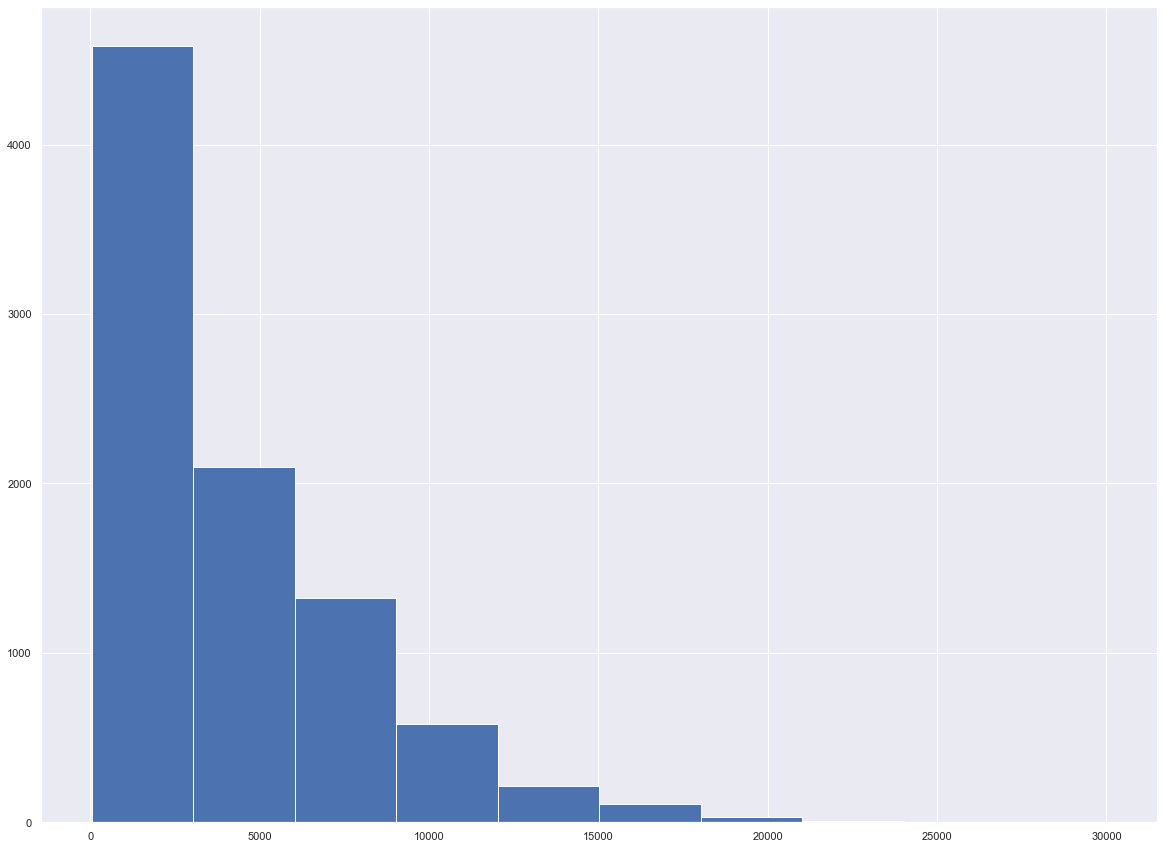

In [19]:
plt.hist(cc_holders["CREDIT_LIMIT"])

I think it is reasonable to replace the missing values by the medium, since the missing values are only taking a very small component in our sample, and the distribution of data seems to be concentrated as shown in the histogram above.

In [20]:
# Your code here
cc_holders["MINIMUM_PAYMENTS"].fillna(cc_holders["MINIMUM_PAYMENTS"].median(), inplace=True)
cc_holders["CREDIT_LIMIT"].fillna(cc_holders["CREDIT_LIMIT"].median(), inplace=True)

2.12 Check if there are any missing values left

In [21]:
# Your code here
cc_holders.isna().sum().sum()

0

2.13 Drop the CUST_ID column. And why do we do so?

*Your answer here*

Because the variable **CUST_ID** are full of strings which are irrelavant to our task and purpose.

In [22]:
# Your code here
del cc_holders["CUST_ID"]

2.14 Using the standard scaler, scale the data. Again, why do we do so?

*Your answer here*

Using the standard scaler to convert the data to a standard range from their natural range. It also helps the model converge faster, and help the model learn appropriate weights for each features.

In [23]:
# Your code here
scaled_data = pd.DataFrame(StandardScaler().fit_transform(cc_holders))
scaled_data.columns = cc_holders.columns
scaled_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768


2.15 By doing PCA, naturally, we can explain more variance if we allow more components. 

Plot the explained variance over the number of components and decide on a reasonable number of components.

<AxesSubplot:xlabel='# of components'>

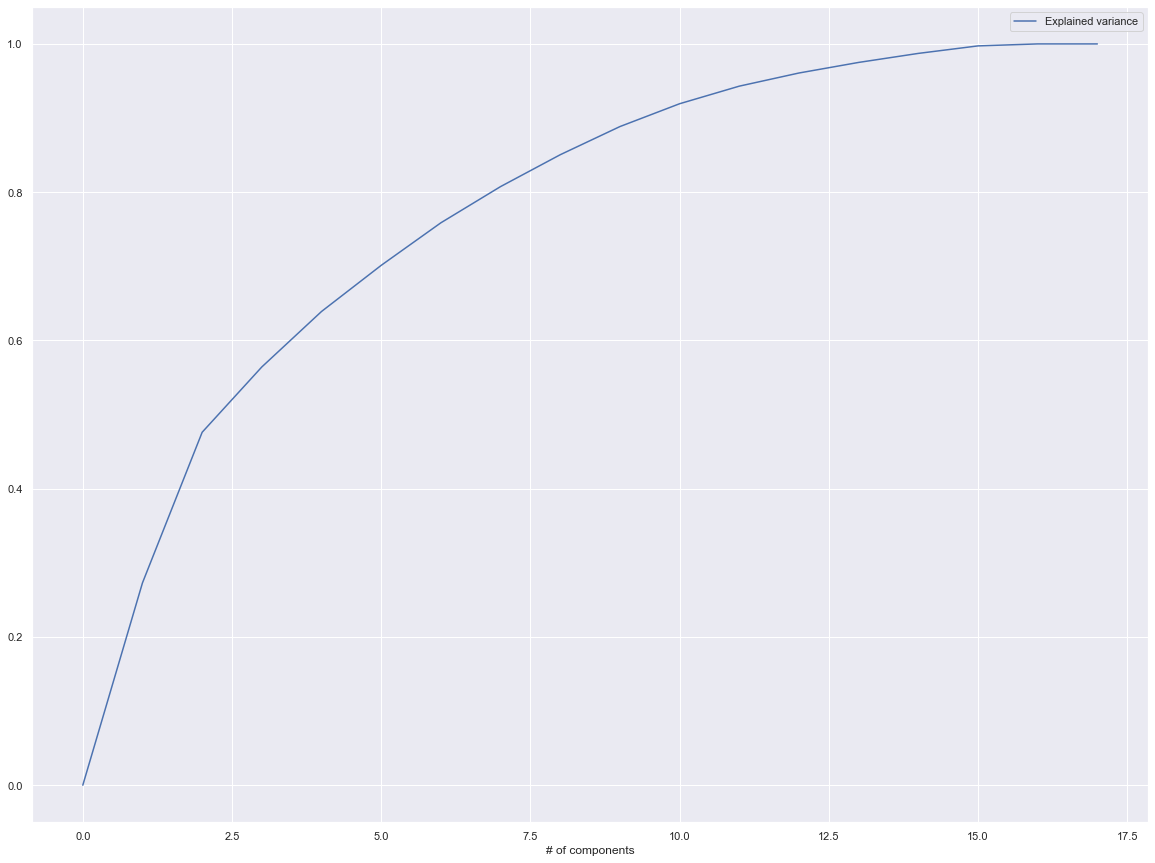

In [24]:
# Your code here
explained_var = []
for num in range(cc_holders.shape[1] + 1):
    pca = PCA(num)
    pca.fit(scaled_data)
    explained_var.append([num, sum(pca.explained_variance_ratio_)])
    
pd.DataFrame(
    explained_var, columns=["# of components", "Explained variance"]).set_index("# of components").plot()

The plot above shows that the proportions of variance the model can explain, by taking different number of components.

2.16 Perform PCA with your chosen number of components and print out the explained variances by each component. When looking back at our EDA, why do we need so many components?

Because we actually have many aspects to explain the distribution and statistics of our data, such as purchases and balance, and our model will fail if we cannot explain a sufficient proportion of variances.

In [25]:
# Your code here
pca = PCA(10)
pca.fit(scaled_data)
print(f"Variance explained: {pca.explained_variance_ratio_}")

Variance explained: [0.27297671 0.2031378  0.08813182 0.07479524 0.06224729 0.05740056
 0.04883426 0.04299203 0.03798259 0.03080002]


2.17 Plot the observations following PC1 and PC2

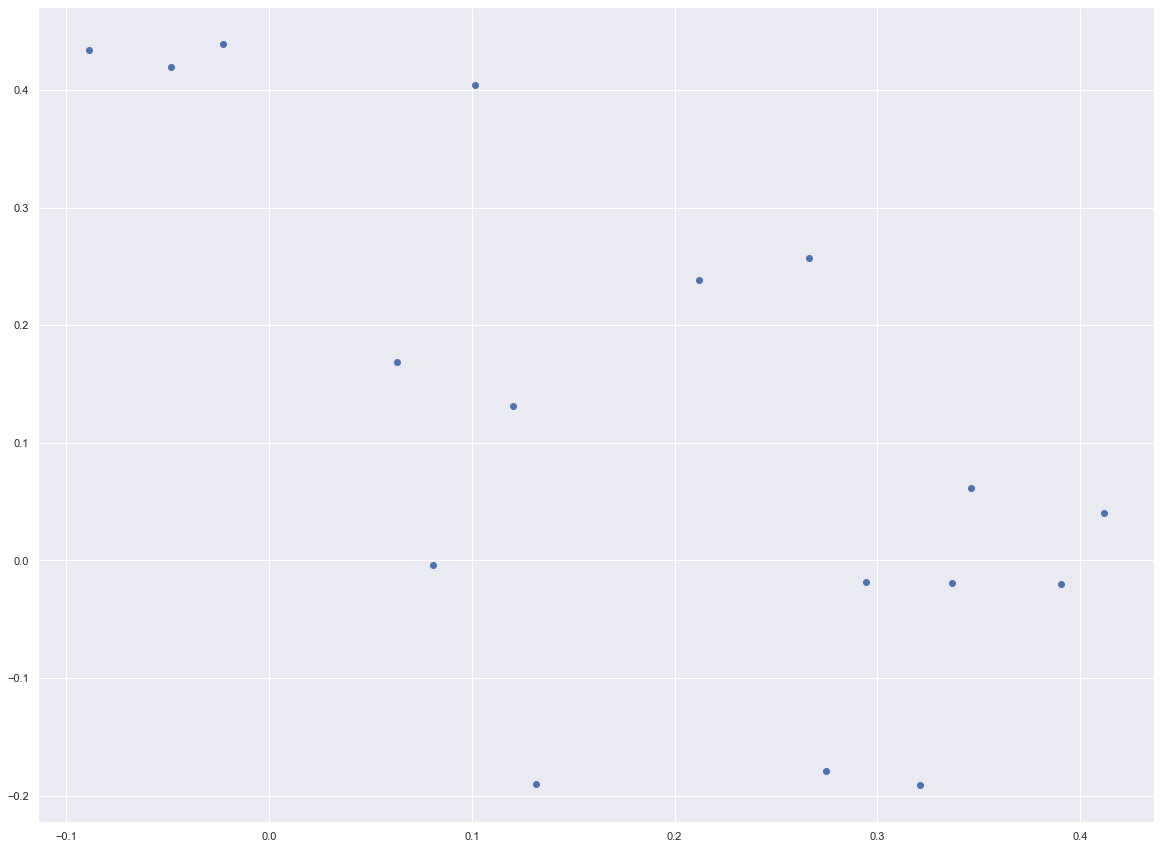

In [26]:
# Your code here
pc = pd.DataFrame(pca.components_.T, columns = ["PC"+str(i) for i in range(1,11)])
plt.scatter(pc["PC1"], pc["PC2"])

2.18 You have learnt in class, that a well-known measure to find a good number of clusters is Inertia. Following the lecture notes, plot the inertia graph for 1-19 clusters

In [27]:
# Your code here
res = []
for num in range(1, 20):
    clf = KMeans(n_clusters=num)
    clf.fit(cc_holders)
    res.append([num, clf.inertia_])

inertia_df = pd.DataFrame(res, columns=["# of clusters", "Inertia"]).set_index("# of clusters")

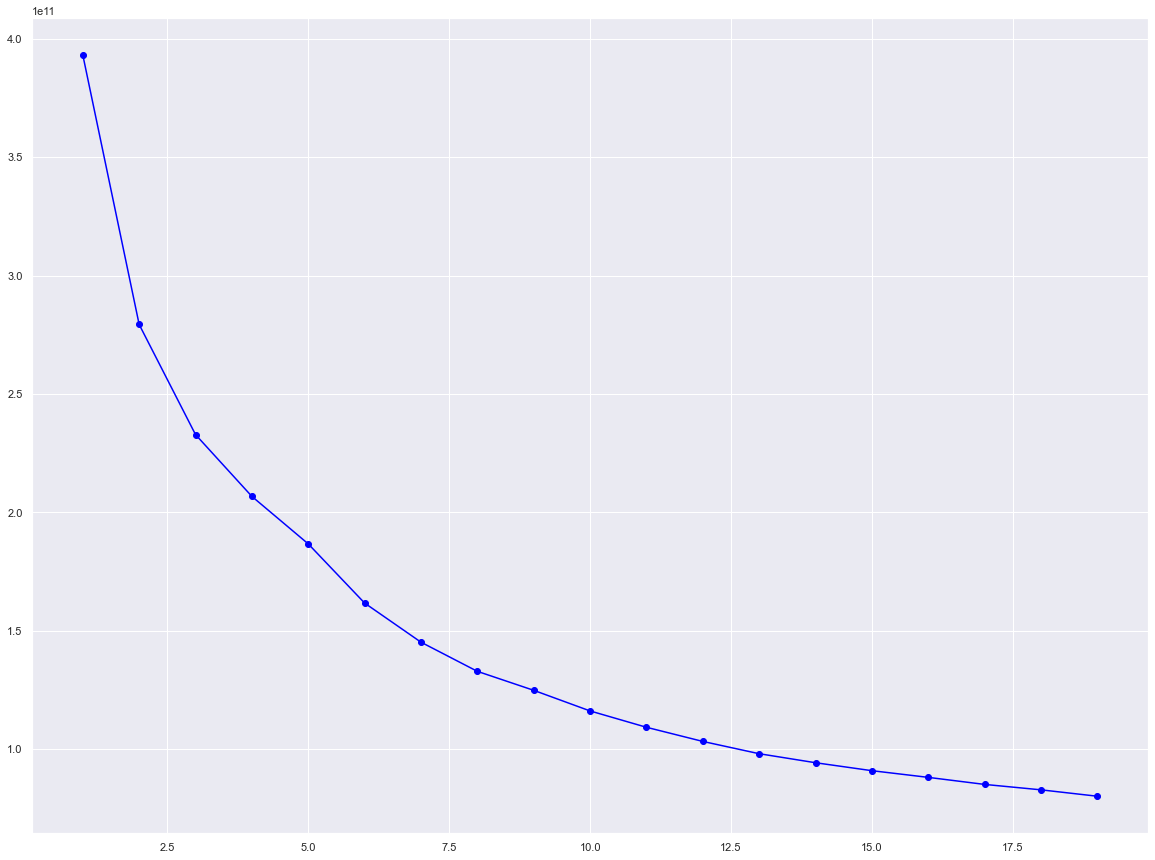

In [28]:
# The code for the plot here
plt.figure()

plt.plot(inertia_df, "o", color = "blue")
plt.plot(inertia_df, color = "blue")

2.19 Using inertia, we have found the right number of clusters for our use case. Now fit the model and plot the outcome.

In [29]:
# Your code here
clf = KMeans(n_clusters=6)

In [30]:
# Your code here
clf.fit(cc_holders)

KMeans(n_clusters=6)

In [31]:
# Print out the clusters
print(clf.labels_)

[4 1 1 ... 4 4 4]


In [32]:
50*0.35 + 80*0.35 + 225/5*0.3

59.0